In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("project1.2.csv")
data.columns

Index(['rebate', 'ad.spent', 'xmas', 'sales'], dtype='object')

<h2>Visualization</h2>

Text(0, 0.5, 'Sales')

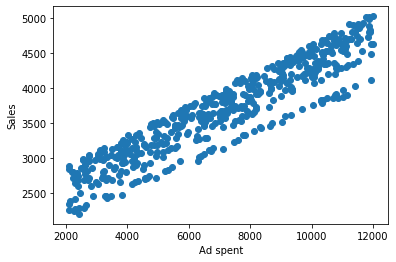

In [3]:
plt.scatter(data['ad.spent'],data['sales'])
plt.xlabel('Ad spent')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

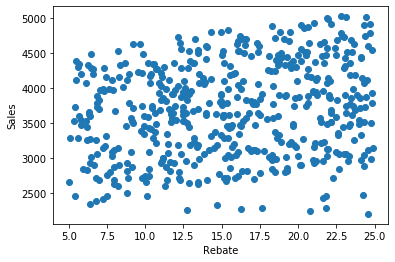

In [59]:
plt.scatter(data['rebate'], data['sales'])
plt.xlabel('Rebate')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

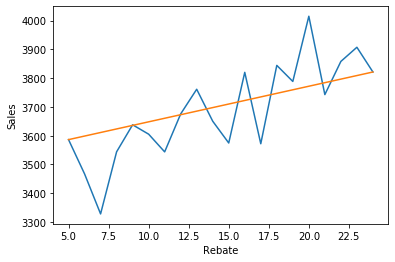

In [63]:
data['rebate_ca'] = data['rebate'] // 1
a = data.groupby('rebate_ca').sales.mean()
plt.plot(a)
plt.plot([a.index[0], a.index[-1]], [a.iloc[0], a.iloc[-1]])
plt.xlabel('Rebate')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

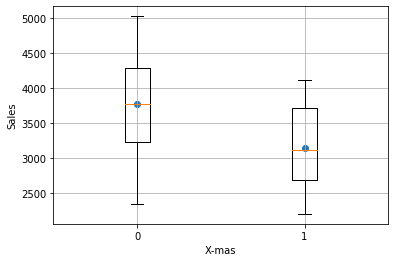

In [67]:
# plt.scatter(data['xmas'], data['sales'])
xmas = data.groupby('xmas').mean().sales
# plt.bar(['Off-season','Season'],xmas)
plt.grid()
plt.boxplot((data.loc[data.xmas==0,'sales'], data.loc[data.xmas==1, 'sales']), labels=[0,1])
plt.scatter([1,2],xmas)
plt.xlabel('X-mas')
plt.ylabel('Sales')
# plt.xticks(['hello','world'])
# data.loc[data.xmas==0,'sales']

<h2>Scipy optimize  w/o xmas</h2>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.optimize import least_squares

In [8]:
def simple_regression(c, x):
    #c[0] : intercept
    #x[0] : rebate
    #c[1] : coefficient for rebate
    #x[1] : ad.spent
    #c[2] : coefficient for ad.spent
    return c[0] + c[1]*x[0] + c[2]*x[1]

def diminishing_return(x, r):
    return (1-np.exp((-1)*x*r)) / r

def regression_with_diminishing_return(c, x):
    #c[3] : r for rebate
    #c[4] : r for ad.spent
    return c[0] + c[1]*diminishing_return(x[0],c[3]) + c[2]*diminishing_return(x[1],c[4])

def simple_func(c,x,y):
    return y - simple_regression(c,x)

def diminishing_func(c,x,y):
    return y - regression_with_diminishing_return(c,x)

In [9]:
c_sim = np.random.rand(3)
c_dim = np.random.rand(5)
c_dim

array([0.78610225, 0.57630974, 0.90599248, 0.57224185, 0.36810269])

In [10]:
x = data[['rebate','ad.spent']].values.T
y = data['sales'].values
x[0]

array([20.95931522, 17.36338864, 13.83892119, 15.97405131, 15.50821144,
       19.15367805,  7.29754704, 10.38286407, 13.86588489, 21.41860643,
       15.38103694, 11.65095995, 13.28450163, 21.9013705 ,  6.37870347,
        6.36255578,  6.29816001, 12.84158569, 11.10028967, 22.82993405,
       13.79808664, 24.27116833, 16.94306499, 15.14171276, 16.09571961,
       16.26038433, 12.43513375,  9.51634443, 24.56153865, 13.48332208,
        7.86109374, 15.40389071, 23.58033582, 15.83328012, 13.52403721,
       22.52507404, 11.71892431, 20.31253777, 24.35311056, 16.74457207,
       20.17849101,  6.95108586, 17.12158973, 10.26165413, 12.25282599,
       12.34447218,  9.16541661, 19.99734187, 20.75935895, 16.29092202,
       15.31002087, 13.45292936,  8.21929095,  8.29191119, 20.6043253 ,
       19.99016093, 13.99253873, 23.09917593, 18.49410929,  6.36548591,
       23.39950014,  6.10844947, 17.38479329, 21.88417585, 22.07323063,
       24.79079893, 20.04352571, 23.20617511, 23.33889674, 11.55

<h2>Simple Regression</h2>

In [11]:
# simple_regression
solv1 = least_squares(simple_func, c_sim, args = (x, y))
print(solv1.x)

[1.71087090e+03 2.71476715e+01 2.19067202e-01]


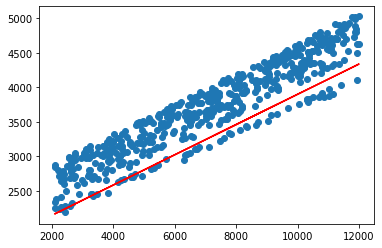

In [12]:
#ad.spent
plt.scatter(x[1], y)
plt.plot(x[1], solv1.x[0]+solv1.x[2]*x[1], color='red')
#plt.gca().set_aspect('equal', adjustable='box')

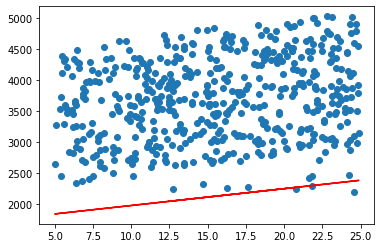

In [13]:
#rebate
plt.scatter(x[0],y)
plt.plot(x[0], solv1.x[0]+solv1.x[1]*x[0], color = 'red')
#plt.gca().set_aspect('equal', adjustable='box')

Text(0, 0.5, 'Real')

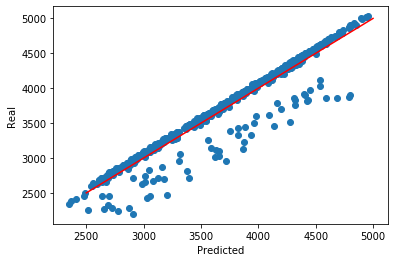

In [14]:
# predicted vs real
plt.scatter( solv1.x[0] + solv1.x[1]*x[0] + solv1.x[2]*x[1], y)
plt.plot([2500,5000], [2500,5000], color='red')
plt.xlabel('Predicted')
plt.ylabel('Real')

<h2>Diminishing return</h2>

In [15]:
#diminishing return
solv2 = least_squares(diminishing_func, c_dim, args=(x, y))
print(solv2)

 active_mask: array([0., 0., 0., 0., 0.])
        cost: 9505088.330992086
         fun: array([  72.95411065,   92.0637896 ,   63.113686  ,   79.1570493 ,
         95.71832572,  101.60891242,   17.14319732,   27.15053885,
         63.41404674,   72.47385134,   59.54359082,   74.92331442,
        101.17932087,   86.37834691,   34.65947178,    3.6396822 ,
         -4.05482543,   86.95021073,   55.90489557,   81.83158409,
         61.01234358,  101.98885763,   89.32877997,   79.74311795,
         88.80139291,   78.77801703,   57.55766396,   51.41701921,
         78.35233194,   56.85648967,   52.38923483,  112.68777929,
         64.36509203,   55.57918488,   70.73662266,   65.45092882,
         65.03063921,   95.81007283,   85.11067021,   68.31542214,
         72.18232107,   30.40466539,   57.40493338,   56.76427728,
         83.04868081,   56.65190661, -282.18233162, -639.20413663,
       -515.99281161, -381.21844097, -419.05958253, -507.51500918,
         59.78742148,   32.91205014,   77

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


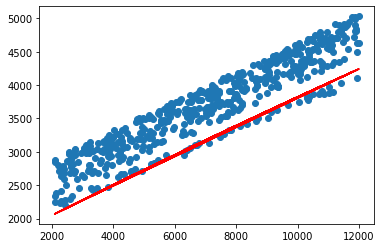

In [16]:
#ad.spent
plt.scatter(x[1], y)
plt.plot(x[1], solv2.x[0]+solv2.x[2]*diminishing_return(x[1],solv2.x[4]), color='red')
# plt.gca().set_aspect('equal', adjustable='box')

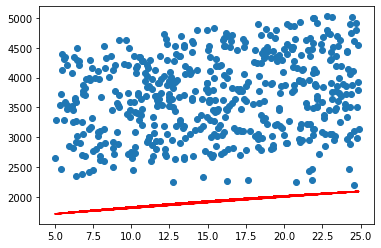

In [17]:
#rebate
plt.scatter(x[0],y)
plt.plot(x[0], solv2.x[0]+solv1.x[1]*diminishing_return(x[0], solv2.x[3]), color='red')
#plt.gca().set_aspect('equal', adjustable='box')

Text(0, 0.5, 'Real')

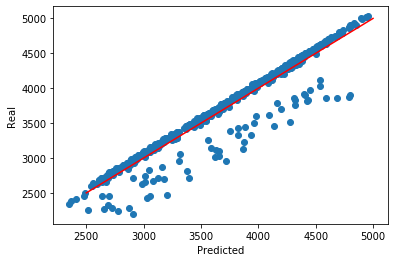

In [18]:
# predicted vs real    simpe regression
plt.scatter(solv1.x[0] + solv1.x[1]*x[0] + solv1.x[2]*x[1],y)
plt.plot([2500,5000], [2500,5000], color='red')
plt.xlabel('Predicted')
plt.ylabel('Real')

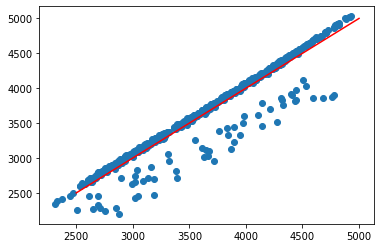

In [19]:
# predicted vs real  Diminishing Return
plt.scatter(solv2.x[0] + solv2.x[1]*diminishing_return(x[0],solv2.x[3]) + solv2.x[2]*diminishing_return(x[1],solv2.x[4]), y)
plt.plot([2500,5000], [2500,5000], color='red')

<h2>Using dummy data for validating the model (Algorithm validation)</h2>

In [20]:
# simple_regression
np.random.seed(0)
e = np.random.randn(10000)
x_rand = np.random.randint(1,10000,(2,10000))
y_rand_sim = solv1.x[0] + solv1.x[1]*x_rand[0] + solv1.x[2]*x_rand[1] + e

In [21]:
solv4 = least_squares(simple_func, c_sim, args=(x_rand, y_rand_sim))
print(solv4.x)
print(solv1.x)
print(solv4.x - solv1.x)

[1.71090034e+03 2.71476685e+01 2.19060670e-01]
[1.71087090e+03 2.71476715e+01 2.19067202e-01]
[ 2.94436505e-02 -3.05238601e-06 -6.53214113e-06]


In [22]:
# diminishing return
np.random.seed(0)
e = np.random.randn(10000)
x_rand = np.random.randint(1,10000, (2,10000))
y_rand_dim = solv2.x[0] + solv2.x[1]*diminishing_return(x_rand[0], solv2.x[3]) + solv2.x[2]*diminishing_return(x_rand[1], solv2.x[4]) + e

In [23]:
solv3 = least_squares(diminishing_func, c_dim, args=(x_rand, y_rand_dim))
print(solv3.x)
print(solv2.x)
print(solv3.x - solv2.x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app


[1.58434617e+03 3.95015689e+01 2.35915771e-01 2.46849517e-02
 1.06013527e-05]
[1.58421590e+03 3.95104680e+01 2.35904508e-01 2.46882777e-02
 1.05857621e-05]
[ 1.30271483e-01 -8.89908088e-03  1.12627744e-05 -3.32603821e-06
  1.55905623e-08]


<h1>With standardized data</h1>

In [25]:
n_data = (data - data.mean())/data.std()

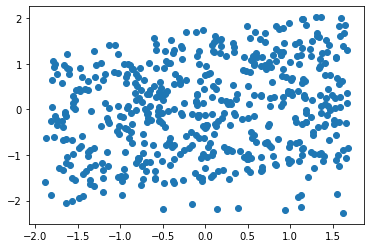

In [26]:
plt.scatter(n_data['rebate'], n_data['sales'])

In [27]:
n_x = n_data[['rebate','ad.spent']].values.T
n_y = n_data['sales'].values
n_x[0]

array([ 9.73107724e-01,  3.28772977e-01, -3.02757394e-01,  7.98250921e-02,
       -3.64625062e-03,  6.49565309e-01, -1.47487105e+00, -9.22029684e-01,
       -2.97925913e-01,  1.05540565e+00, -2.64339655e-02, -6.94806402e-01,
       -4.02100853e-01,  1.14190954e+00, -1.63951369e+00, -1.64240711e+00,
       -1.65394584e+00, -4.81464579e-01, -7.93478048e-01,  1.30829385e+00,
       -3.10074316e-01,  1.56654087e+00,  2.53457442e-01, -6.93171781e-02,
        1.01626179e-01,  1.31131566e-01, -5.54294516e-01, -1.07729668e+00,
        1.61857077e+00, -3.66475286e-01, -1.37389215e+00, -2.23389203e-02,
        1.44275431e+00,  5.46010594e-02, -3.59179761e-01,  1.25366763e+00,
       -6.82628235e-01,  8.57215149e-01,  1.58122366e+00,  2.17890563e-01,
        8.33196032e-01, -1.53695157e+00,  2.85446330e-01, -9.43748641e-01,
       -5.86961264e-01, -5.70539675e-01, -1.14017755e+00,  8.00736891e-01,
        9.37278635e-01,  1.36603450e-01, -3.91589524e-02, -3.71921194e-01,
       -1.30970872e+00, -

In [28]:
# simple_regression
n_solv1 = least_squares(simple_func, c_sim, args = (n_x, n_y))
print(n_solv1.x)

[-3.70493219e-12  2.30392945e-01  9.36881826e-01]


In [33]:
#diminishing return
n_solv2 = least_squares(diminishing_func, c_dim, args=(n_x, n_y))
print(n_solv2.x)

[0.02972221 0.22853451 0.9354677  0.13778139 0.02977066]


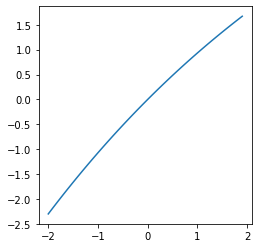

In [34]:
a = np.array([a * 0.1 for a in range(-20, 20)])
r = 0.1378
b = diminishing_return(a,r)
plt.plot(a,b)
plt.gca().set_aspect('equal', adjustable='box')

<h2>Scipy w/ xmas interaction</h2>

In [41]:
def simple_regression_interaction(c, x):
    #c[0] : intercept
    #x[0] : rebate
    #c[1] : coefficient for rebate
    #x[1] : ad.spent
    #c[2] : coefficient for ad.spent
    #x[2] : xmas
    #c[3] : coefficient for rebate * xmas
    #c[4] : coefficient for ad.spent * xmas
    #c[5] : coefficient for rebate * ad.spent
    #c[6] : coefficient for rebate * ad.spent * xmas
    return c[0] + c[1]*x[0] + c[2]*x[1] + c[3]*x[0]*x[2] + c[4]*x[1]*x[2] + c[5]*x[0]*x[1] + c[6]*x[0]*x[1]*x[2]

def diminishing_return(x, r):
    return (1-np.exp((-1)*x*r)) / r

def regression_with_diminishing_return_interaction(c, x):
    #c[7] : r for rebate
    #c[8] : r for ad.spent
    return c[0] + c[1]*diminishing_return(x[0],c[7]) + c[2]*diminishing_return(x[1],c[8]) + + c[3]*x[0]*x[2] + c[4]*x[1]*x[2] + c[5]*x[0]*x[1] + c[6]*x[0]*x[1]*x[2]

def simple_func_interaction(c,x,y):
    return y - simple_regression_interaction(c,x)

def diminishing_func_interaction(c,x,y):
    return y - regression_with_diminishing_return_interaction(c,x)

In [42]:
x_inter = data[['rebate','ad.spent', 'xmas']].values.T
y = data['sales'].values

In [44]:
c_sim_inter = np.random.rand(7)
c_dim_inter = np.random.rand(9)

In [45]:
# simple_regression_interaction
solv1_inter = least_squares(simple_func_interaction, c_sim_inter, args = (x_inter, y))
print(solv1_inter.x)

[ 1.74923129e+03  2.85556018e+01  2.16834986e-01 -2.56439406e+01
 -1.00226500e-02  1.92053928e-04 -9.90430012e-04]


Text(0, 0.5, 'Real')

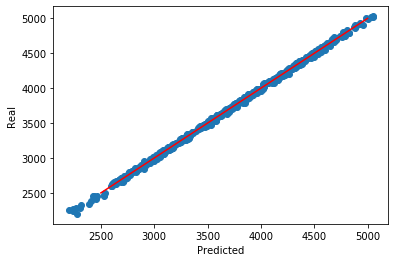

In [53]:
# predicted vs real    simpe regression _ interaction
plt.scatter(solv1_inter.x[0] + solv1_inter.x[1]*x_inter[0] + solv1_inter.x[2]*x_inter[1] + solv1_inter.x[3]*x_inter[0]*x_inter[2] + solv1_inter.x[4]*x_inter[1]*x_inter[2] + solv1_inter.x[5]*x_inter[0]*x_inter[1] + solv1_inter.x[6]*x_inter[0]*x_inter[1]*x_inter[2],y)
plt.plot([2500,5000], [2500,5000], color='red')
plt.xlabel('Predicted')
plt.ylabel('Real')

In [55]:
# diminishing_return_interaction
solv2_inter = least_squares(diminishing_func_interaction, c_dim_inter, args = (x_inter, y))
print(solv2_inter.x)

[ 1.58539781e+03  5.53986750e+01  2.18029920e-01 -2.57163674e+01
 -1.10243757e-02  1.18560263e-04 -9.42671641e-04  4.32685695e-02
 -1.15805148e-08]


Text(0, 0.5, 'Real')

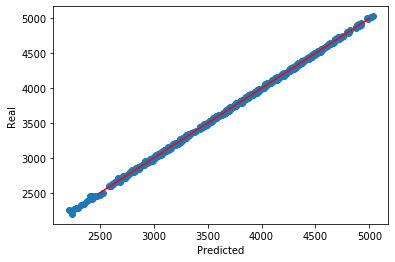

In [57]:
# predicted vs real  Diminishing Return
plt.scatter(solv2_inter.x[0] + solv2_inter.x[1]*diminishing_return(x_inter[0],solv2_inter.x[7]) + solv2_inter.x[2]*diminishing_return(x_inter[1],solv2_inter.x[8]) + solv2_inter.x[3]*x_inter[0]*x_inter[2] + solv2_inter.x[4]*x_inter[1]*x_inter[2] + solv2_inter.x[5]*x_inter[0]*x_inter[1] + solv2_inter.x[6]*x_inter[0]*x_inter[1]*x_inter[2], y)
plt.plot([2500,5000], [2500,5000], color='red')
plt.xlabel('Predicted')
plt.ylabel('Real')